# **PREDICTION USING SUPERVISED ML - PERCENTAGE OF A STUDENT BASED ON NO. OF STUDY HOURS**

# **Importing** **Libraries** **and** **Dataset**

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [ ]:
# Observing first 5 Data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Observing Last 5 Data
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# To find the number of columns and rows 
df.shape

(25, 2)

In [ ]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Checking fir no. of null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Data** **Visualization**

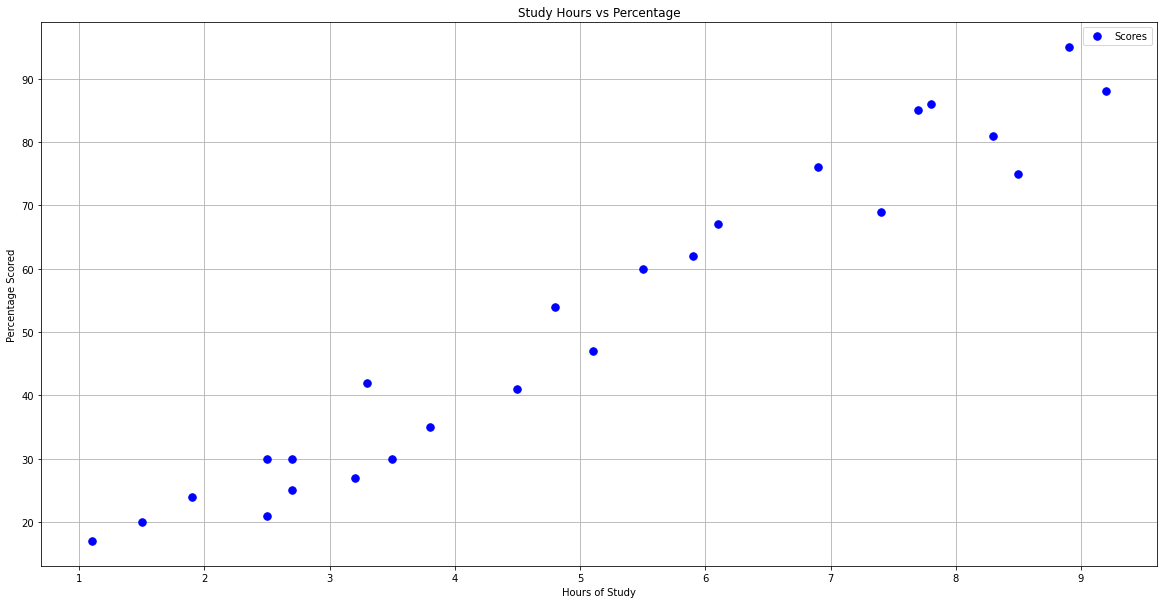

In [ ]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [20,10]
df.plot(x='Hours', y='Scores', style='.', color='blue', markersize=15)
plt.title('Study Hours vs Percentage')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Scored')  
plt.grid()
plt.show()

The graph above helps to illustrate that, there is a linear relationship between "hours of study" and "percentage scored". 
Thus, we can apply the 'Linear Regression' supervised model on the data to predict the results.

In [ ]:
# we can also use .corr to determine the corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **Data Preparation**

In [ ]:
# using iloc function we will divide the data 
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
#Data Splitting

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

# **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

# **Model Visualization**

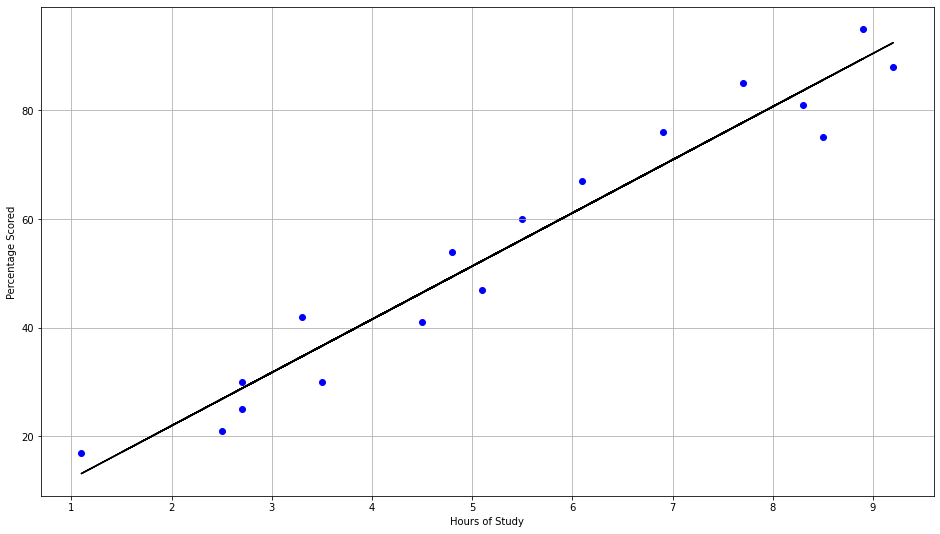

In [ ]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='black');
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Scored') 
plt.grid()
plt.show()

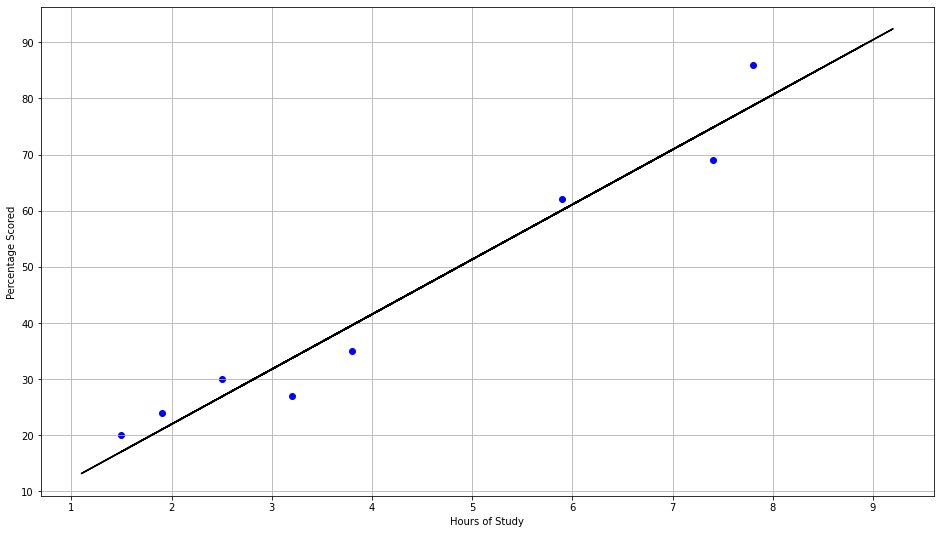

In [ ]:
# Plotting for the testing data

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color='blue')
plt.plot(X, line, color='black');
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Scored') 
plt.grid()
plt.show()

# **Predicitng**

In [ ]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = model.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [ ]:
# Comparing Actual vs Predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]])

In [ ]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [ ]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.053665412465456], [33.69422877993883], [7..."


In [ ]:
# Testing with your own data - Test1.0

hours = 9.25
own_pred = model.predict([[hours]])
print("No. of hours studied :",hours,"\nPredicted score :",own_pred[0],"%")

No. of hours studied : 9.25 
Predicted score : [92.91505723] %


**Hence, it can be concluded that if a person studies for 9.25 hours, the predicted score is 92.92%**

In [ ]:
# Testing with your own data - Test2.0

hours = 6.39
own_pred = model.predict([[hours]])
print("No. of hours studied :",hours,"\nPredicted score :",own_pred[0],"%")

No. of hours studied : 6.39 
Predicted score : [64.91975651] %


**Hence, it can be concluded that if a person studies for 6.39 hours,the predicted score is 64.92%**

In [ ]:
# Testing with your own data - Test3.0

hours = 7.82
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 7.82 hours is [78.91740687]


**Hence, it can be concluded that the predicted score if a person studies for 7.82 hours is 78.92%**

# **Model Evaluation**

In [ ]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
